In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Assign column names (assuming the last column is the target)
column_names = [f'feature_{i}' for i in range(1, 17)] + ['target']
train_data = pd.read_csv('/content/pendigits-train.csv', header=None, names=column_names)

# Display the first few rows to verify
print(train_data.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         47        100         27         81         57         37   
1          0         89         27        100         42         75   
2          0         57         31         68         72         90   
3          0        100          7         92          5         68   
4          0         67         49         83        100        100   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0         26          0          0          23          56          53   
1         29         45         15          15          37           0   
2        100        100         76          75          50          51   
3         19         45         86          34         100          45   
4         81         80         60          60          40          40   

   feature_13  feature_14  feature_15  feature_16  target  
0         100          90          40          98       8  
1       

In [7]:
# Assign column names (assuming the last column is the target)
column_names = [f'feature_{i}' for i in range(1, 17)] + ['target']
test_data = pd.read_csv('/content/pendigits-test.csv', header=None, names=column_names)

# Display the first few rows to verify
print(test_data.head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         88         92          2         99         16         66   
1         80        100         18         98         60         66   
2          0         94          9         57         20         19   
3         95         82         71        100         27         77   
4         68        100          6         88         47         75   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0         94         37         70           0           0          24   
1        100         29         42           0           0          23   
2          7          0         20          36          70          68   
3         77         73        100          80          93          42   
4         87         82         85          56         100          29   

   feature_13  feature_14  feature_15  feature_16  target  
0          42          65         100         100       8  
1       

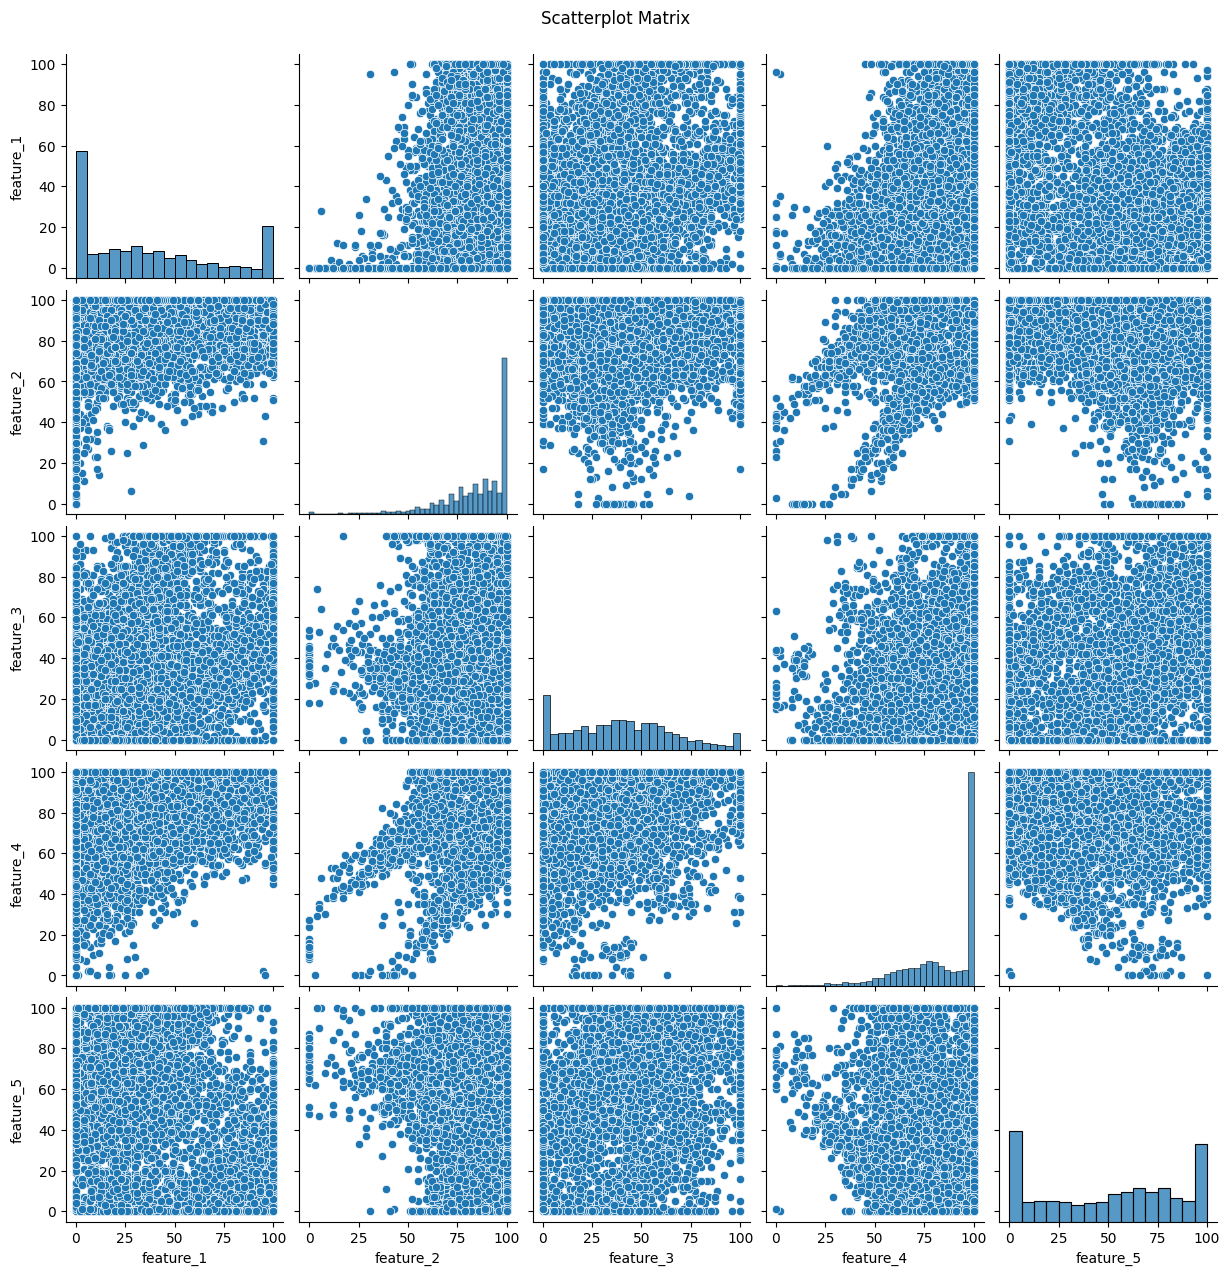

In [4]:
# Plot the scatterplot matrix for a subset of the features
sns.pairplot(train_data.iloc[:, :5])  # Selecting the first few columns for visualization
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [5]:
# Compute the correlation matrix
correlation_matrix = train_data.corr()

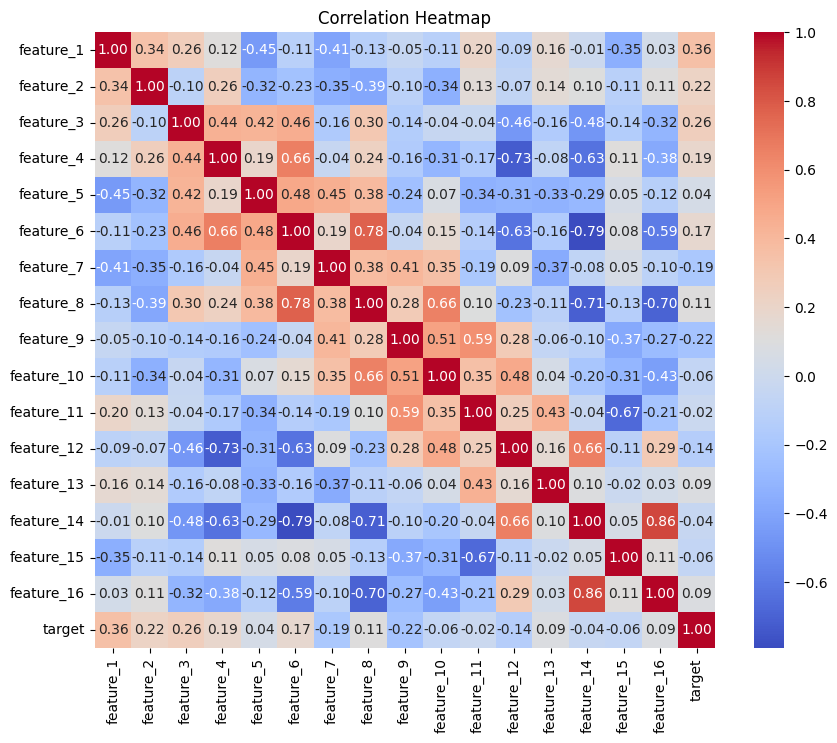

In [6]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

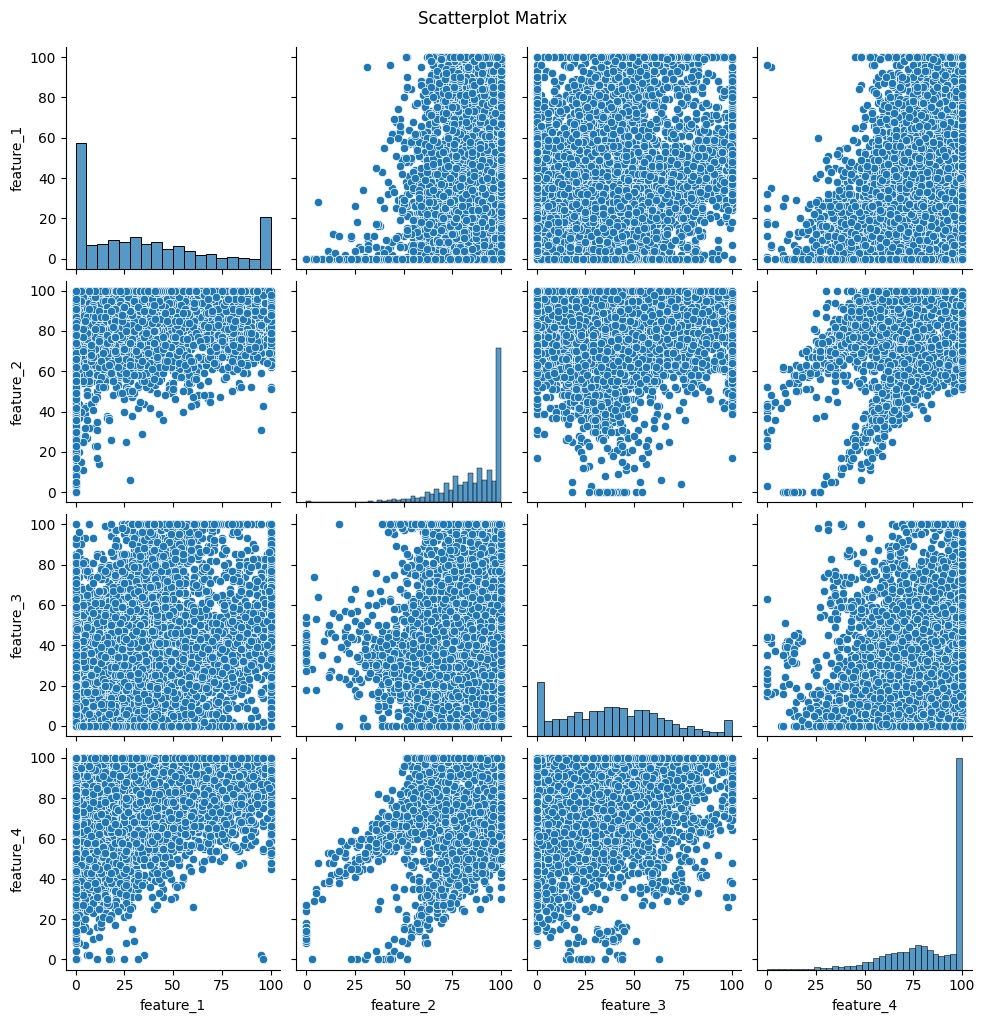

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a scatterplot matrix for a subset of the features (e.g., the first 4 features)
sns.pairplot(train_data.iloc[:, :4])  # Adjust the number of columns as needed
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

In [9]:
# Compute the correlation matrix
correlation_matrix = train_data.corr()

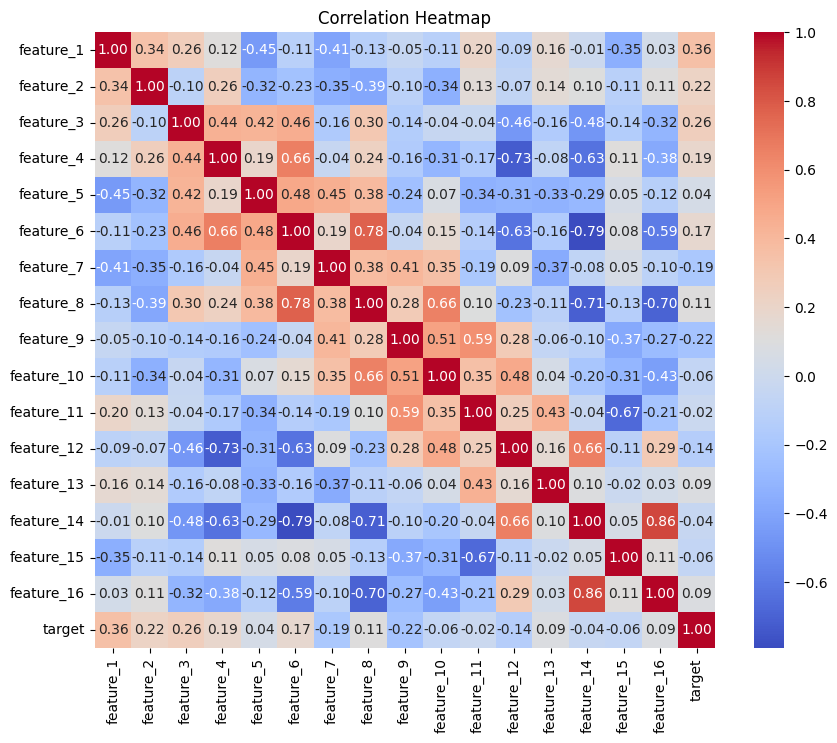

In [10]:
# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X_train = train_data.iloc[:, :-1]  # All columns except the last one
y_train = train_data.iloc[:, -1]   # The last column

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

# Fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=train_data.columns[:-1], class_names=str(dt.classes_))
plt.title("Decision Tree")
plt.show()

# Evaluate the model on the test set
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


InvalidParameterError: The 'class_names' parameter of plot_tree must be an array-like, an instance of 'bool', an instance of 'numpy.bool_' or an instance of 'int' or None. Got '[0 1 2 3 4 5 6 7 8 9]' instead.

<Figure size 2000x1000 with 0 Axes>

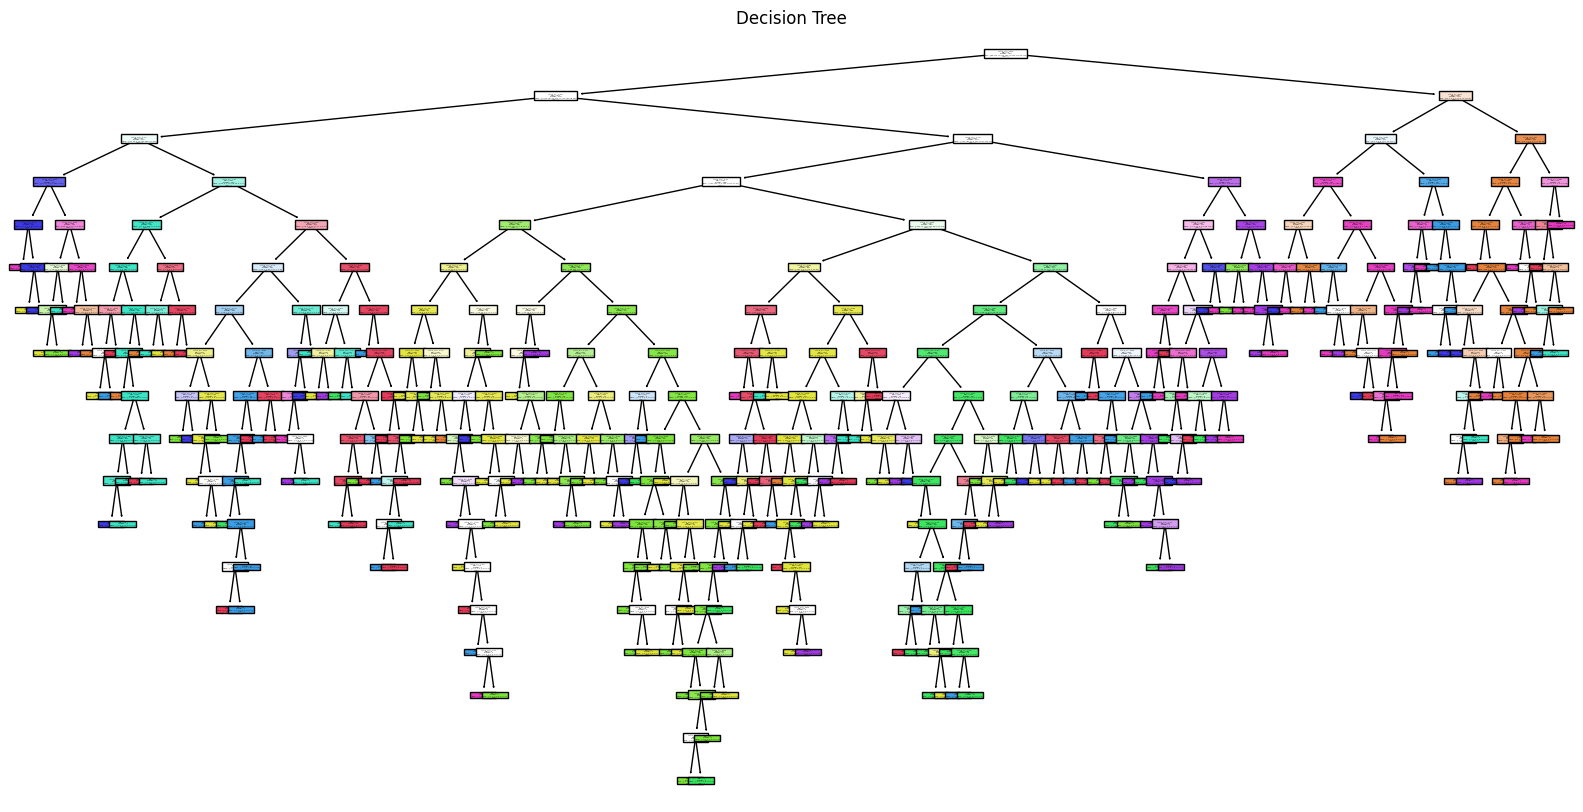

Accuracy: 0.9179531160663236
Confusion Matrix:
[[350   0   0   0   0   0   1   1  11   0]
 [  0 316  44   1   1   1   0   1   0   0]
 [  0   9 350   0   0   2   1   2   0   0]
 [  1  11   2 314   0   3   0   0   0   5]
 [  0   0   0   2 353   2   4   1   0   2]
 [  0   2   1  26   8 280   0   1   4  13]
 [  9   5   1   1   0   0 317   0   3   0]
 [  0  14   4   8  24   0   1 311   2   0]
 [  3   0   0   0   2   3   2  18 308   0]
 [  0   6   0   3   4   2   0   6   3 312]]


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Fit the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Convert class labels to strings
class_names = [str(cls) for cls in dt.classes_]

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=train_data.columns[:-1], class_names=class_names)
plt.title("Decision Tree")
plt.show()

# Evaluate the model on the test set
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


In [25]:
# Example of pruning by setting max depth
dt_pruned = DecisionTreeClassifier(max_depth=13, random_state=42)
dt_pruned.fit(X_train, y_train)

# Evaluate the pruned model
y_pred_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
conf_matrix_pruned = confusion_matrix(y_test, y_pred_pruned)

print(f"Accuracy after pruning: {accuracy_pruned}")
print("Confusion Matrix after pruning:")
print(conf_matrix_pruned)

Accuracy after pruning: 0.9213836477987422
Confusion Matrix after pruning:
[[349   0   0   0   1   0   1   1  11   0]
 [  0 319  41   1   1   1   0   1   0   0]
 [  0  10 351   0   0   0   1   2   0   0]
 [  1  10   4 316   0   1   0   3   0   1]
 [  0   2   0   3 353   1   3   0   0   2]
 [  0   2   0  27   8 282   0   1   5  10]
 [ 11   5   1   2   0   0 316   1   0   0]
 [  0  16   4   9  24   0   1 308   2   0]
 [  7   0   0   0   2   3   1   4 318   1]
 [  1   8   0   4   2   2   1   5   2 311]]


In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Bagging with Decision Tree
bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_bagging_dt = bagging_dt.predict(X_test)
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)
conf_matrix_bagging_dt = confusion_matrix(y_test, y_pred_bagging_dt)

print(f"Bagging (Decision Tree) Accuracy: {accuracy_bagging_dt}")
print("Confusion Matrix:")
print(conf_matrix_bagging_dt)

# Bagging with SVM
bagging_svm = BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=42)
bagging_svm.fit(X_train, y_train)
y_pred_bagging_svm = bagging_svm.predict(X_test)
accuracy_bagging_svm = accuracy_score(y_test, y_pred_bagging_svm)
conf_matrix_bagging_svm = confusion_matrix(y_test, y_pred_bagging_svm)

print(f"Bagging (SVM) Accuracy: {accuracy_bagging_svm}")
print("Confusion Matrix:")
print(conf_matrix_bagging_svm)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging (Decision Tree) Accuracy: 0.9508290451686678
Confusion Matrix:
[[351   0   0   0   0   0   0   0  12   0]
 [  0 337  24   1   1   0   0   1   0   0]
 [  0   6 356   0   0   0   0   2   0   0]
 [  0   6   1 327   0   0   0   0   0   2]
 [  0   0   3   0 354   4   2   0   0   1]
 [  0   0   0  13   9 300   0   0   5   8]
 [  1   3   0   0   3   1 327   0   1   0]
 [  0  28   4   2   1   0   0 325   4   0]
 [  4   1   0   0   0   1   0   0 330   0]
 [  0   5   0   4   2   1   1   3   1 319]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging (SVM) Accuracy: 0.9788450543167524
Confusion Matrix:
[[351   0   0   0   0   0   0   0  12   0]
 [  0 350  11   1   1   0   0   1   0   0]
 [  0   1 363   0   0   0   0   0   0   0]
 [  0   1   0 333   0   0   0   0   0   2]
 [  0   0   0   0 359   4   1   0   0   0]
 [  0   0   0   5   0 329   0   0   0   1]
 [  0   0   0   0   0   0 336   0   0   0]
 [  0  15   2   0   0   0   0 339   0   8]
 [  0   0   0   0   0   1   0   0 335   0]
 [  0   2   0   0   0   1   0   3   1 329]]


In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model and tune the number of estimators
num_estimators = [10, 50, 100, 150, 200]
for n in num_estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f"Random Forest with {n} estimators: Accuracy = {accuracy_rf}")


Random Forest with 10 estimators: Accuracy = 0.9625500285877644
Random Forest with 50 estimators: Accuracy = 0.9631217838765008
Random Forest with 100 estimators: Accuracy = 0.9636935391652373
Random Forest with 150 estimators: Accuracy = 0.9636935391652373
Random Forest with 200 estimators: Accuracy = 0.9639794168096055


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting with different number of estimators
n_estimators = [10, 50, 100, 150, 200]
best_n = None
best_accuracy = 0

for n in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n, random_state=42)
    gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    print(f"Gradient Boosting with {n} estimators: Accuracy = {accuracy_gb}")
    if accuracy_gb > best_accuracy:
        best_accuracy = accuracy_gb
        best_n = n

# Further tuning with best number of estimators
learning_rates = [0.1, 0.3, 0.5, 0.7, 0.9]
for lr in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=best_n, learning_rate=lr, random_state=42)
    gb.fit(X_train, y_train)
    y_pred_gb = gb.predict(X_test)
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    print(f"Gradient Boosting with learning rate {lr}: Accuracy = {accuracy_gb}")


Gradient Boosting with 10 estimators: Accuracy = 0.8727844482561463
Gradient Boosting with 50 estimators: Accuracy = 0.9502572898799314
Gradient Boosting with 100 estimators: Accuracy = 0.9625500285877644
Gradient Boosting with 150 estimators: Accuracy = 0.961978273299028
Gradient Boosting with 200 estimators: Accuracy = 0.9625500285877644
Gradient Boosting with learning rate 0.1: Accuracy = 0.9625500285877644
Gradient Boosting with learning rate 0.3: Accuracy = 0.9654088050314465
Gradient Boosting with learning rate 0.5: Accuracy = 0.9651229273870783
Gradient Boosting with learning rate 0.7: Accuracy = 0.9562607204116638
Gradient Boosting with learning rate 0.9: Accuracy = 0.691538021726701


In [33]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Adjust number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the best model on reduced data
best_model = GradientBoostingClassifier(n_estimators=best_n, learning_rate=0.7, random_state=42)
best_model.fit(X_train_pca, y_train)
y_pred_pca = best_model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy after PCA: {accuracy_pca}")


Accuracy after PCA: 0.6123499142367067
